## Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe

30 August 2022

In this GitHub we evaluate the performance of our models introduced in our manuscript. First, we introduce synthetic networks to analyze the impact of graph structure on the campaign. We discuss and compare our low-complexity fast algorithm and the rule of thumb against alternative algorithms from the literature to analyze their comparative advantage for the specific budgeted portfolio optimization problem. Furthermore, we argue how Nano-, Micro-, and Macro-influencers differ in each of the various graph structure across different algorithms. We numerically investigate the impact of each type of influencers on the different types of networks.

Subsequently, we use a real large Twitter database [12] to evaluate the performance of our low-complexity fast algorithm based on Frank-Wolfe, for various campaign objectives. Finally, we perform a sensitivity analysis of the multi-platform model introduced to analyze the potential ROI-ratio resulting from an optimal budget allocation between $L=2$ networks, one synthetic and the real Twitter data trace [12].

### Social network platform

Let us first describe a generic social network platform,
such as Facebook, Twitter or Instagram. A set of users generate and share some content, denoted as posts, through the platform. Each user has a list of followers and a list of leaders. A user can simultaneously be follower and/or leader of others. As a follower, he (she) is interested in the content posted by his (her) leaders. With each user a Newsfeed is associated, which is a list of received posts.

We consider a constant number $N$ of active users in a specific time window, forming
the set $\mathcal{N}$. Users are labelled by an index $n=1,...,N$. They can be nodes of a friendship graph, which we do not need to know. We denote by $\lambda^{(n)}$ [posts/time window] the rate with which user $n$ generates new posts, and  we make the assumption that content posted instantaneously appears on the Newsfeeds of his followers and can be further propagated through the social network - depending on the platform. For all users $n \in \mathcal{N}$ we suppose that they keep a constant post rate $\lambda^{(n)}$ during the time-window.

At each point in time, a user sees in his (her) Newsfeed posts originated by other users who may or may not be their direct leaders, depending on the type of platform. The number of these viewed posts are called ***impressions*** and the ***impression ratio*** is the ratio of the impressions originated by some given user over all viewed impressions in a given snapshot. The average ratio over several snapshots is called the ***average impression ratio*** in the time window.

Let us denote by $p^{(j)}_n$ the average impression ratio of posts that originate from user $n$ in the Newsfeed of user $j$. This quantity $p^{(j)}_n$ is assumed known for the rest of the article and can be measured or estimated in two ways:

1) ***Empirically:*** By taking multiple Newsfeed snapshots in the time window and calculating the average of the ratio of impressions between pairs of users over those time points.

2) ***Markovian analysis:*** If we assume complete knowledge of the social graph and user posting activity, the values $p^{(j)}_n$ can be derived using the Markovian diffusion model introduced in [8].

Our model does not require explicit knowledge of the list of followers and leaders of each user, nor a diffusion process as in the approach by Kempe et al. [5]. However, it does require knowledge over the average impression ratio, that contains all this information resulting from diffusion. Furthermore, we are interested in studying the relative impact between pairs of users and not the absolute impact, since the Walls and Newsfeeds can vary in size between users.

Note here that in Instagram and other OSPs, due to the lack of a re-posting option the propagation of information is only given to the immediate followers of a user, thus hindering post-propagation. These networks are simpler to describe; the user sets form a bipartite graph (leaders/followers).

### The Budgeted Portfolio Optimization Problem

In the budgeted portfolio optimization problem an advertiser $i \in \mathcal{N}$ with a certain monetary budget $B$ [EUR/time window] in his (her) disposal orchestrates an advertising campaign in a unit of time (equal to the time window) by investing on other users to create posts in his (her) favour. The aim is to maximize some impact metric, e.g. the number of impressions, the sales, or the audience reach.

We suppose that for each user $n\ne i$ there is an associated cost per post $c_n$ [EUR/post] so that the user $n$ will be willing to create posts in favor of the advertiser $i$.

In order to formulate this optimisation problem, we need to quantify the participation of each user $n$ in the campaign of the advertiser $i$. Hence, we define for each user $n \in \mathcal{N}\setminus \{i \} $, the continuous participation ratio $a_n \in [0,1]$ in the campaign as the unknown proportion of user $n$'s generated posts acquired by the advertiser $i$ in the unit of time, we fix $a_i=1$ meaning that the advertiser always posts to promote its own product. Then, $a_n \lambda_n$ [posts/time window] represents the number of posts that the user $n$ creates in favor of the advertiser $i$.

Similarly, we define by $p^{(j)}_n(a_n)$ the campaign-related impression ratio as the average value of the impression ratio in the Newsfeed of user $j$ originating from user $n$ and related to the campaign of the advertiser $i$. The campaign-related impression ratio can be similarly estimated and measured as above and satisfies:
\begin{equation}
p^{(j)}_n(a_n) \leq p^{(j)}_n \ \ \forall n,j \in \mathcal{N}.
\end{equation}

The empirical probability that an impression reaching user $j$ is related to the campaign is called the ***potential of user $j$*** and equals:
\begin{equation}
\label{omega}
\omega^{(j)}(\mathbf{a})=\sum_{n \in \mathcal{N}\setminus \{j \} } p^{(j)}_n(a_n) \leq 1.
\end{equation}

In the above $\mathbf{a}=(a_1,...,a_{i-1},a_{i+1},...,a_N)^{T}$ is the participation vector of all the users into the advertising campaigns of user $i$, excluding user $i$, whose $a_i=1$.

We introduce a utility function $U_j$ for each user $j$ that maps the potential of user $j$, $\omega^{(j)}$, to the campaign objective of the advertiser. Different expressions for $U_j$ model different performance metrics. 

The budget invested to user $n\not =i$ by the advertiser $i$ is $ B_n(a_n) = c_n a_n \lambda ^ {(n)}$ [EUR/time window]. Given that the total budget of the advertiser $i$ is $B$ [EUR/time window], the constraints in our Budgeted Portfolio Optimization (BPO) problem will be naturally a budget restriction $\sum_{n \not =i} B_n(a_n) \leq B$ and the continuous unknown variables $a_n \in [0,1]$. Altogether, we can formulate the general budgeted portfolio optimization problem:

\begin{align*}
\label{[BPO]}
\textrm{max}_{\{a_n \}_{n \not=i}} \quad & U(\mathbf{a}):=\sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\omega^{(j)}(\mathbf{a})),\\
\textrm{ s.t.} \quad & \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B,\tag*{[BPO]}\\
& a_i=1, \ 0 \leq a_n \leq 1,  \forall n \in \mathcal{N}.
\end{align*}

Here, $U(\mathbf{a})$ is the total utility of the advertiser's campaign. If $U_j$ are linear, then the problem can be solved by a greedy algorithm, but in general we need to appeal to iterative processes to approximate the desired advertising policy.

### Assumption on ad propagation and impact metrics

An assumption that we consider a linear propagation for the posts related to the campaign and seen on the Newsfeeds, namely:
\begin{equation}
    p^{(j)}_n(a_n)=a_n p^{(j)}_n.
\end{equation}

This is reasonable because if the user $j$ is an immediate follower of influencer $n$, and all posts from the influencer appear on his Newsfeed, then a percentage $a_n$ will be related to the campaign. This is actually the case for platforms without sharing, like Instagram, but for other platforms, impressions can result from diffusion, arriving through sharing of content from intermediate users. Then, the above linear expression implies that a post from $j$ is shared randomly, independently of its content, which of course is not true. We will use however the linear assumption as a reasonable approximation to the campaign diffusion process for any platform, because we lack of any prior information related to how users might react to the campaign’s posts. So, for the rest of the article, the potential of the user $j$ is expressed as: 
\begin{equation}
    \omega^{(j)}(\mathbf{a})=\sum_{n \in \mathcal{N}\setminus \{j \} } a_n p^{(j)}_n.
\end{equation}

The utility function $U_j$ in [BPO] of the user $j$, represents from a modeling point of view the following:

1) ***Impressions/Engagements:*** In this case, the objective function for each user is a linear function. This translates as follows: an increase in the impression potential of a user $j$ results in a proportional increase in their utility.

2) ***Conversion/Sales:*** A concave utility function models diminishing returns over the potential of each user $j$. As the amount of one participation ratio increases, then after some point the marginal conversion/sales (extra output gained by adding an extra unit) decreases.

3) ***Reach:*** We model this case by the $\alpha$-fair concave function, when $\alpha\rightarrow \infty$. This gives a *max-min* solution. Alternatively, we can provide user-specific thresholds $\epsilon_j$ for each user $j$. Then, if the user $j$ sees more than the threshold $\epsilon_j$ campaign-related impression ratio $\omega^{(j)}(\mathbf{a})$, then the user $j$ is consider to be reached by the campaign:
    \begin{equation}
    U_j(\omega^{(j)}(\mathbf{a}))=I_{\omega^{(j)}(\mathbf{a})>\epsilon_j}.
\end{equation}


Hence, under the assumption of linear propagation and activity constraints $\{r_n \}_{n \not=i}$ we have the formulation of the general budgeted portfolio optimization problem [BPO-G] in an OSP for various impact objectives:
\begin{align*}
\label{[BPO-G]}
\textrm{max}_{\{a_n \}_{n \not=i}} \quad & U(\mathbf{a}):=\sum_{j \in \mathcal{N}\setminus \{i \} } U_j\left(\sum_{n \in \mathcal{N}\setminus \{j \} } a_n p^{(j)}_n\right), \\
\textrm{ s.t.} \quad & \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \tag*{[BPO-G]}\\
& a_i=r_i, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}. 
\end{align*}

## Numerical evaluations in synthetic networks 

We consider user sets 
$\mathcal{N}$ of size $N \leq 20,000$ %different users 
within an hourly time window, and we investigate the following network structures:

1) ***Albert-Barabasi ($\texttt{AB}$) model:*** An undirected graph generated by preferentially attaching new arriving nodes each with $A$ edges to existing ones in proportion to their degree. This is a scale-free network with a total of $A(N-A)$ edges.

2) ***Erdos-Renyi ($\texttt{ER}$) model:*** An undirected graph where each edge is included with probability $A(N-A)/\binom{N}{2}$, independently from every other edge. As in the \texttt{AB} model, \texttt{ER} has an expected number of $A(N-A)$ edges.

For each network structure, we choose homogeneous posting rates, namely, $\lambda^{(n)}=\lambda$ [posts/time window]$, \forall n \in \mathcal{N}$, so that we can better investigate the effects of network structure and cost per post on the campaign. Values for the average impression ratios $\{ p^{(j)}_n \}_{n,j \in \mathcal{N}}$ are calculated analytically using the Markovian method introduced in [8], by setting the re-posting rates as constants equal also to $\lambda$ for this model. We assume complete knowledge of the social graph, the posting rates and the impression ratios. For numerical studies, we select $A=4,\ \lambda=1$ to result in a sparse matrix of impressions as the network size increases, i.e. $D \ll_{N \rightarrow \infty} N^{2}$, where $D$ is the number of pairs with positive impressions.

We consider for the study a budget proportional to the network size $B=\frac{1}{100} N$ [EUR/time window]. Note that the above budget is normalized and it is invested in an hourly time window, so although this metric is low, the time window is also low. In addition, we will assume that the campaign is coordinated by the user $i=0$, where the number of followers will be different in each model.

As a next step, we determine the price per post $c_n$ charged to the advertiser $i$ by user $n$. On Twitter, it is a common and approximate market practice to consider the price per post of user $n$ as $2\frac{\textit{#Followers}_n}{1000}$ [EUR/post] by [4]. So, for our simulation purposes with small networks we omit the factor $\frac{1}{1000}$ in the price to get reasonable budget values. We consider no restrictions on user participation ratios, i.e. $r_n=1, \forall n \in \mathcal{N}$. For user utilities, we use the logarithmic function $U_j(x) =log(\delta x+1), \forall j \in \mathcal{N}\setminus \{i \}$ which quantifies the ROI of the advertising campaign, with a $\delta=1,000$ selected for simulation purposes.

Influencers are distinguished by their ability to disseminate posts through their followers. For the aim of our numerical simulation study, we will define the influence of a user $n$ based on their relative number of followers. So, we denote a user $n \in \mathcal{N}$ in a network as a:

1) ***Nano-influence:*** If the number of his/her followers is up to the sixth decile of the degree distribution. 

2) ***Micro-influencer:*** If the number of his/her followers is greater than the sixth decile of the degree distribution, but not higher than the ninth decile.

3) ***Macro-influencer:*** If the number of his/her followers is not less than the ninth decile of the degree distribution. 

The advertiser in the Albert-Barabasi model and in the Erdos-Renyi model will most likely be a Nano-influencer or a Micro-influencer due to degree statistics.

### Frank-Wolfe benefits

The first point we want to illustrate is the benefit of our Frank-Wolfe algorithm compared to alternative optimisation approaches that we could have used. All these algorithms were programmed to adapt to [BPO-G]. We compare the solution of [BPO-G] using five algorithms or approaches: 

1) ***The Frank-Wolfe (FW) algorithm adaptation*** introduced in section 3 of our paper.

2) ***The Projected Subgradient (PS) method [13]***; here we can not avoid the projection on the feasibility set, due to the restriction of $a_n\in[0,1].$

3) ***The Mirror Descent (MD) method [14]***; it adapts the PS method to the geometry of the [BPO-G] problem by the Bregman divergence associated to the function $\mathbf{a}\in \mathcal{M} \rightarrow \sum_{j \in \mathcal{N}\setminus \{i \}  | a_j \not = 0} a_j log(a_j).$

4) ***The Budgeted Influence Maximization (BIM) approach [7]***; it solves the BIM problem by a CELF implementation [16] of $1,000$ Monte Carlo simulations under the assumption of an independent cascade model, with a probability of influence being propagated between any two users equal to $p=\frac{\sum_{n,j \in \mathcal{N}}  (p^{(j)}_n)^{1/k}}{N^2}$ with $k$ the average shortest path between any two users.

5) ***A community-based approach for the Budgeted Influence Maximization (BIMCOM) problem [16]***; This
approach consists of four steps: a community detection
to understand the structure of the network, a budget
distribution to divide the budget among the communities, seed selection for influence maximization and
finally, budget transfer, in which unutilized budget of
one community is transferred to another community.
Similarly as in BIM we considered 1, 000 Monte Carlo
simulations under the assumption of an independent
cascade model, with a probability of influence propagation equal to $p$.

6) ***The rule of thumb*** that we presented in our section 3.3.

The stopping criterion in the first three algorithms (FW, PS and MD) is when the number of iterations reaches up to $20$, or when the theoretical optimality gap is less than $0.1$.

We compare the five methods across the different network structures on the following performance metrics for $\texttt{ER}$ and $\texttt{AB}$. 

Using the implementation below for the 5 algorithms above, we obtain the following tables and plots:

In [1]:
import pandas as pd
AB=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1\Log utility function[AB graph-Optimums and runtimes].txt', sep="\t", header=None, names=['Number of users','Number of edges','Budget','Optimum of FW algorithm','Time of FW algorithm in seconds','Optimum of the PSG method','Time of the PSG method in seconds','Optimum of the Mirror method','Time of the Mirror method in seconds','Optimum heuristic algorithm','Time of heuristic in seconds','Optimum of BIM CELF','Time of BIM CELF','Optimum of BIMCOM','Time of BIMCOM'])
AB_I=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1\Log utility function[AB graph-Influencers].txt', sep="\t", header=None, names=['Number of users','Number of edges','Budget','Number of Nano-influencers [FW]','Number of Micro-influencers [FW]','Number of Macro-influencers [FW]','Number of Nano-influencers [BIM]','Number of Micro-influencers [BIM]','Number of Macro-influencers [BIM]','Number of Nano-influencers [H]','Number of Micro-influencers [H]','Number of Macro-influencers [H]','Number of Nano-influencers [BIMCOM]','Number of Micro-influencers [BIMCOM]','Number of Macro-influencers [BIMCOM]'])
AB

,Number of users,Number of edges,Budget,Optimum of FW algorithm,Time of FW algorithm in seconds,Optimum of the PSG method,Time of the PSG method in seconds,Optimum of the Mirror method,Time of the Mirror method in seconds,Optimum heuristic algorithm,Time of heuristic in seconds,Optimum of BIM CELF,Time of BIM CELF,Optimum of BIMCOM,Time of BIMCOM
0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10.0,24.0,0.0001,7.259805,0.000000,7.259805,0.007937,7.259805,0.001996,7.259805,0.000000,7.259805,0.320145,7.257047,0.170542
2,50.0,184.0,0.0005,7.450212,0.000996,7.450212,0.103725,7.450212,0.025929,7.448832,0.000000,7.449913,2.679798,7.446717,0.686707
3,100.0,384.0,0.0010,7.554220,0.003991,7.554220,0.328124,7.554220,0.080739,7.553984,0.000000,7.551335,10.873600,7.546563,1.137121
4,200.0,784.0,0.0020,7.669518,0.013963,7.669518,0.615356,7.669518,0.404958,7.661690,0.000000,7.657514,23.558391,7.646133,1.934917
5,300.0,1184.0,0.0030,7.726714,0.031913,7.726714,1.317481,7.726714,0.801855,7.554325,0.000000,7.604938,39.236090,7.641016,3.288499
6,400.0,1584.0,0.0040,7.775015,0.071808,7.775015,2.277912,7.775015,1.163925,7.667899,0.000997,7.622978,43.439848,7.742836,2.973321
7,500.0,1984.0,0.0050,7.799696,0.072769,7.799696,3.016939,7.799696,1.752317,7.630106,0.000000,7.671467,67.447771,7.744894,4.083999
8,600.0,2384.0,0.0060,7.768305,0.096731,7.768305,4.045196,7.768305,2.202075,7.712254,0.000997,7.829595,68.565150,7.709999,3.807779
9,700.0,2784.0,0.0070,7.878687,0.147587,7.878687,5.734637,7.878687,2.700782,7.393362,0.000000,7.842881,58.813657,7.806945,3.731875


In [2]:
ER=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1\Log utility function[ER graph-Optimums and runtimes].txt', sep="\t", header=None, names=['Number of users','Number of edges','Budget','Optimum of FW algorithm','Time of FW algorithm in seconds','Optimum of the PSG method','Time of the PSG method in seconds','Optimum of the Mirror method','Time of the Mirror method in seconds','Optimum heuristic algorithm','Time of heuristic in seconds','Optimum of BIM CELF','Time of BIM CELF','Optimum of BIMCOM','Time of BIMCOM'])
ER_I=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1\Log utility function[ER graph-Influencers].txt', sep="\t", header=None, names=['Number of users','Number of edges','Budget','Number of Nano-influencers [FW]','Number of Micro-influencers [FW]','Number of Macro-influencers [FW]','Number of Nano-influencers [BIM]','Number of Micro-influencers [BIM]','Number of Macro-influencers [BIM]','Number of Nano-influencers [H]','Number of Micro-influencers [H]','Number of Macro-influencers [H]','Number of Nano-influencers [BIMCOM]','Number of Micro-influencers [BIMCOM]','Number of Macro-influencers [BIMCOM]'])
ER

,Number of users,Number of edges,Budget,Optimum of FW algorithm,Time of FW algorithm in seconds,Optimum of the PSG method,Time of the PSG method in seconds,Optimum of the Mirror method,Time of the Mirror method in seconds,Optimum heuristic algorithm,Time of heuristic in seconds,Optimum of BIM CELF,Time of BIM CELF,Optimum of BIMCOM,Time of BIMCOM
0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10.0,21.0,0.0001,7.261687,0.000000,7.261687,0.004985,7.261687,0.000998,7.261687,0.000000,7.249390,0.216420,7.249637,0.183508
2,50.0,185.0,0.0005,7.534730,0.000998,7.534730,0.071769,7.534730,0.017952,7.534730,0.000000,7.473793,2.809519,7.426842,0.725239
3,100.0,385.0,0.0010,8.027518,0.003029,8.027518,0.154550,8.027518,0.073803,8.027050,0.000000,7.609245,9.597436,7.532657,1.526696
4,200.0,786.0,0.0020,8.442073,0.011968,8.442073,0.247340,8.442073,0.266287,8.423756,0.000000,7.959485,26.084455,7.626972,2.261687
5,300.0,1193.0,0.0030,7.844094,0.040891,7.844094,1.198795,7.844094,0.638296,7.842986,0.000000,7.826381,33.495376,7.714536,3.198446
6,400.0,1590.0,0.0040,8.150902,0.047908,8.150902,1.945800,8.150902,1.050154,8.035829,0.000000,7.947953,60.921058,7.862196,3.111358
7,500.0,1983.0,0.0050,8.446696,0.077755,8.446696,3.371988,8.446696,1.965782,8.424684,0.000994,8.403824,80.894269,7.956418,3.828042
8,600.0,2381.0,0.0060,8.571552,0.285237,8.552486,4.080133,8.552486,2.537181,8.266373,0.000959,8.469209,94.960015,8.102502,5.242940
9,700.0,2794.0,0.0070,8.917667,0.143616,8.917667,5.962107,8.917667,3.750974,8.875493,0.000000,8.863929,126.653215,8.061995,6.552476


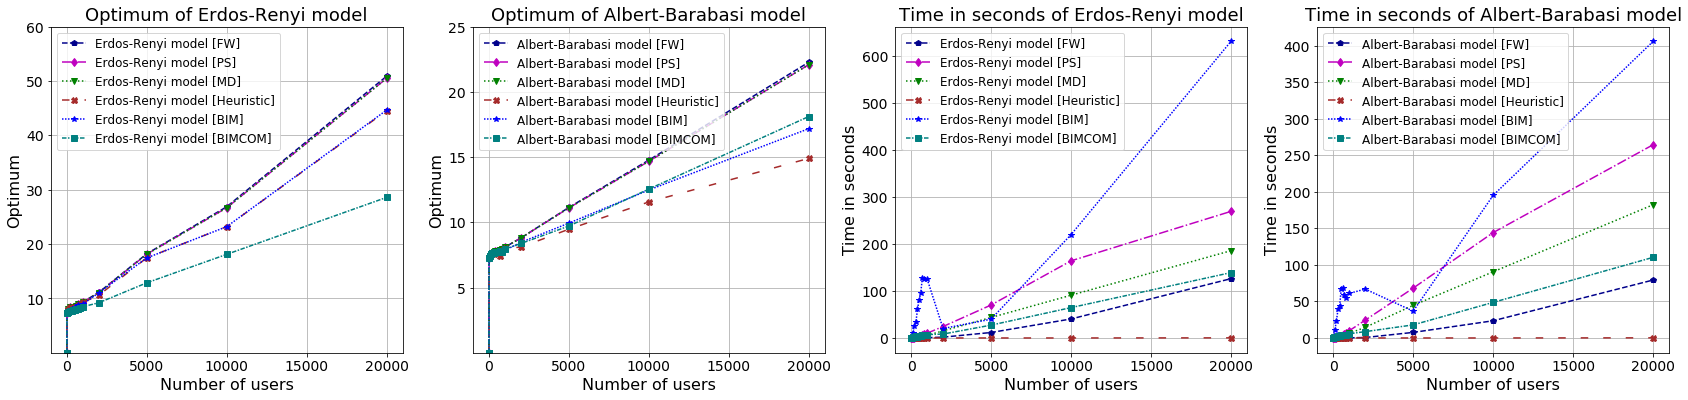

In [3]:
import matplotlib.pyplot as plt
labels_size= 16
Title_size= 18
Labels_graph_size=12
marker_size=8
fig, axes = plt.subplots(1,4,figsize=(29,6)) #22,6

from collections import OrderedDict
linestyles_dict = OrderedDict(
    [('solid',               (0,())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

ER.plot('Number of users','Optimum of FW algorithm', color='darkblue',linestyle='dashed',marker='p',label = "Erdos-Renyi model [FW]",ax=ax1)
ER.plot('Number of users','Optimum of the PSG method', color='m',linestyle='-.',marker='d',label = "Erdos-Renyi model [PS]",ax=ax1)
ER.plot('Number of users','Optimum of the Mirror method', color='green',linestyle='dotted',marker='v',label = "Erdos-Renyi model [MD]",ax=ax1)
ER.plot('Number of users','Optimum heuristic algorithm', color='brown',marker='X',linestyle=linestyles_dict['loosely dashed'],label = "Erdos-Renyi model [Heuristic]",ax=ax1)
ER.plot('Number of users','Optimum of BIM CELF', color='b',linestyle=linestyles_dict['densely dotted'],marker='*',label = "Erdos-Renyi model [BIM]",ax=ax1)
ER.plot('Number of users','Optimum of BIMCOM', color='teal',linestyle=linestyles_dict['densely dashdotted'],marker='s',label = "Erdos-Renyi model [BIMCOM]",ax=ax1)

AB.plot('Number of users','Optimum of FW algorithm', color='darkblue',linestyle='dashed',marker='p',label = "Albert-Barabasi model [FW]",ax=ax2)
AB.plot('Number of users','Optimum of the PSG method', color='m',linestyle='-.',marker='d',label = "Albert-Barabasi model [PS]",ax=ax2)
AB.plot('Number of users','Optimum of the Mirror method', color='g',linestyle='dotted',marker='v',label = "Albert-Barabasi model [MD]",ax=ax2)
AB.plot('Number of users','Optimum heuristic algorithm', color='brown',linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Albert-Barabasi model [Heuristic]",ax=ax2)
AB.plot('Number of users','Optimum of BIM CELF', color='b',linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi model [BIM]",ax=ax2)
AB.plot('Number of users','Optimum of BIMCOM', color='teal',linestyle=linestyles_dict['densely dashdotted'],marker='s',label = "Albert-Barabasi model [BIMCOM]",ax=ax2)

ax1.set_xlabel('Number of users',fontsize=labels_size) 
ax1.set_ylabel('Optimum',fontsize=labels_size) 
ax1.set_title('Optimum of Erdos-Renyi model',fontsize=Title_size)
ax1.grid(True)
ax1.legend( loc="upper left",fontsize=Labels_graph_size) 

ER.plot('Number of users','Time of FW algorithm in seconds', color='darkblue',linestyle='dashed',marker='p',label = "Erdos-Renyi model [FW]",ax=ax3)
ER.plot('Number of users','Time of the PSG method in seconds', color='m',linestyle='-.',marker='d',label = "Erdos-Renyi model [PS]",ax=ax3)
ER.plot('Number of users','Time of the Mirror method in seconds', color='green',linestyle='dotted',marker='v',label = "Erdos-Renyi model [MD]",ax=ax3)
ER.plot('Number of users','Time of heuristic in seconds', color='brown',linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Erdos-Renyi model [Heuristic]",ax=ax3)
ER.plot('Number of users','Time of BIM CELF', color='b',linestyle=linestyles_dict['densely dotted'],marker='*',label = "Erdos-Renyi model [BIM]",ax=ax3)
ER.plot('Number of users','Time of BIMCOM', color='teal',linestyle=linestyles_dict['densely dashdotted'],marker='s',label = "Erdos-Renyi model [BIMCOM]",ax=ax3)

ax2.set_xlabel('Number of users',fontsize=labels_size) 
ax2.set_ylabel('Optimum',fontsize=labels_size) 
ax2.set_title('Optimum of Albert-Barabasi model',fontsize=Title_size)
ax2.grid(True)
ax2.legend( loc="upper left",fontsize=Labels_graph_size) 

AB.plot('Number of users','Time of FW algorithm in seconds', color='darkblue',linestyle='dashed',marker='p',label = "Albert-Barabasi model [FW]",ax=ax4)
AB.plot('Number of users','Time of the PSG method in seconds', color='m',linestyle='-.',marker='d',label = "Albert-Barabasi model [PS]",ax=ax4)
AB.plot('Number of users','Time of the Mirror method in seconds', color='green',linestyle='dotted',marker='v',label = "Albert-Barabasi model [MD]",ax=ax4)
AB.plot('Number of users','Time of heuristic in seconds', color='brown',marker='X',linestyle=linestyles_dict['loosely dashed'],label = "Albert-Barabasi model [Heuristic]",ax=ax4)
AB.plot('Number of users','Time of BIM CELF', color='b',linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi model [BIM]",ax=ax4)
AB.plot('Number of users','Time of BIMCOM', color='teal',linestyle=linestyles_dict['densely dashdotted'],marker='s',label = "Albert-Barabasi model [BIMCOM]",ax=ax4)

ax3.set_xlabel('Number of users',fontsize=labels_size) 
ax3.set_ylabel('Time in seconds',fontsize=labels_size) 
ax3.set_title('Time in seconds of Erdos-Renyi model',fontsize=Title_size)
ax3.grid(True)
ax3.legend( loc="upper left",fontsize=Labels_graph_size) 

ax4.set_xlabel('Number of users',fontsize=labels_size) 
ax4.set_ylabel('Time in seconds',fontsize=labels_size) 
ax4.set_title('Time in seconds of Albert-Barabasi model',fontsize=Title_size)
ax4.grid(True)
ax4.legend(loc="upper left",fontsize=Labels_graph_size) 

ax1.set_ylim((0.01, 60)) 
ax2.set_ylim((0.01, 25)) 

y_x_axis=14
ax1.xaxis.set_tick_params(labelsize=y_x_axis)
ax1.yaxis.set_tick_params(labelsize=y_x_axis)

ax2.xaxis.set_tick_params(labelsize=y_x_axis)
ax2.yaxis.set_tick_params(labelsize=y_x_axis)

ax3.xaxis.set_tick_params(labelsize=y_x_axis)
ax3.yaxis.set_tick_params(labelsize=y_x_axis)

ax4.xaxis.set_tick_params(labelsize=y_x_axis)
ax4.yaxis.set_tick_params(labelsize=y_x_axis)

plt.savefig('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1/Optimums [5.1].png',dpi=300)

The plots above illustrate how the above metrics vary as we increase the size of the network across the different network structures and for each algorithm executed. Note here that the optimum curve does not exhibit diminishing returns as shown in (i)-(ii), because the budget is increasing proportionally to the network size.

All three optimisation algorithms (FW, PS and MD) find the same solution optimum as we show in (i)-(ii). An almost optimal solution is found for BIM and for the rule of thumb in $\texttt{ER}$, and a not so good approximation for the solution optimum in $\texttt{AB}$. The table below shows the relative errors of the optimum found between FW, BIM and the rule of thumb across different network structures for two $\delta$-values and two network sizes. We observe that a decrease in the network size or an increase in $\delta$ reduces the relative errors of the optimum between FW, BIM and the rule of thumb, which is expected given the selection of the utility functions and the increments in the optimum shown in (i)-(ii). Therefore, our empirical results found in the table verify the results found by [15]. 

   | <div style="width:190px">Network & Algorithm</div> |   <div style="width:60px">$(10K,5)$</div> |  <div style="width:60px">$(20K,5)$</div>  | <div style="width:80px">$(10K,1000)$</div>| <div style="width:80px">$(20K,1000)$</div> |
|---:|:-------------|:-----------|:------|:------|
| Erdos-Renyi, FW vs BIM | 15.456%  | 15.836%       | 13.613%   | 13.957%     |
| Erdos-Renyi, FW vs Heuristic | 15.995%  | 16.171%    | 13.644%   | 14.247%     |
| Albert-Barabasi, FW vs BIM | 31.835%  | 42.835%       | 18.333%   | 29.627%     |
| Albert-Barabasi, FW vs Heuristic | 51.072% | 76.723%   | 27.706%   | 49.450%     |

Considering the execution time, we observe in (iii)-(iv) that the rule of thumb is the fastest tested algorithm regardless of the network structure and the network size, so we have a significant trade off in runtime and solution optimum. Note that, Frank-Wolfe which finds the exact optimum is faster than MD, PS, and BIM for all network structures and network sizes. As expected, we observe a continuous increase in the runtime of BIM except when a disconnected network is encountered, which speeds up the algorithm and is represented as a bump in (iii)-(iv). So, the execution time of BIM is longer than FW, which we know converges from theoretical results. As a side result, MD is faster than PS regardless the network structure and the network size. This is natural since MD takes advantage of the geometry of the feasible set.

### Campaign-related results

We compare the selected number of Nano-, Micro-, and Macro-influencers from FW, BIM and the rule of thumb (Heuristic) for each network structure.

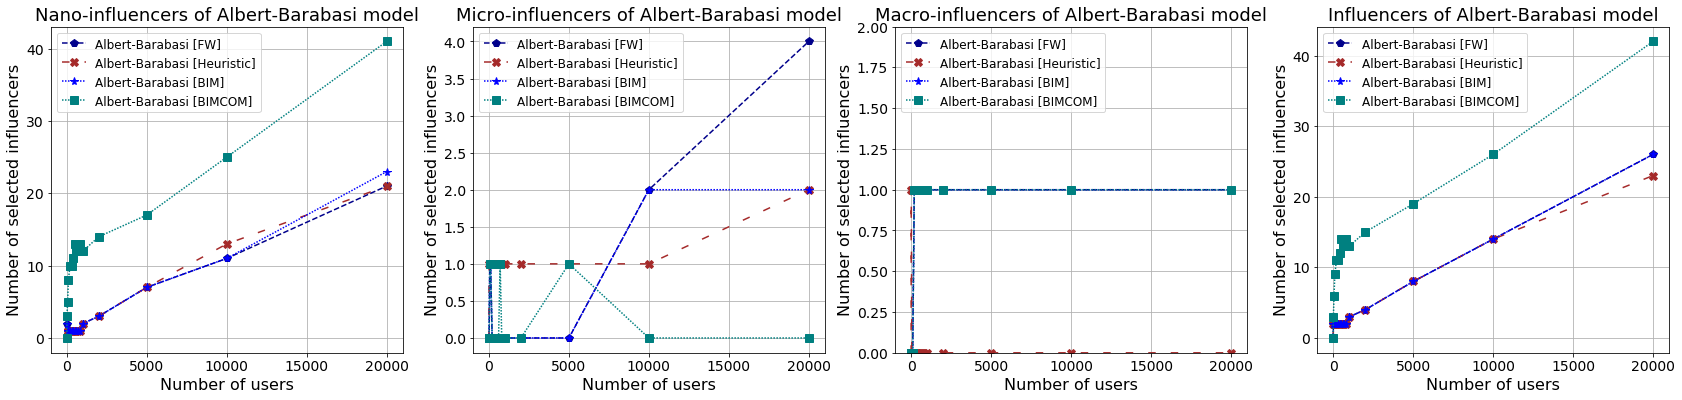

In [4]:
fig, axes = plt.subplots(1,4,figsize=(29,6)) #22,6

labels_size= 16
Title_size= 18
Labels_graph_size=12
marker_size=8

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]

AB_I.plot('Number of users','Number of Nano-influencers [FW]', color='darkblue',linestyle='dashed',ms=marker_size,marker='p',label = "Albert-Barabasi [FW]",ax=ax1)
AB_I.plot('Number of users','Number of Nano-influencers [H]', color='brown',ms=marker_size,linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Albert-Barabasi [Heuristic]",ax=ax1)
AB_I.plot('Number of users','Number of Nano-influencers [BIM]', color='b',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi [BIM]",ax=ax1)
AB_I.plot('Number of users','Number of Nano-influencers [BIMCOM]', color='teal',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='s',label = "Albert-Barabasi [BIMCOM]",ax=ax1)

ax1.set_xlabel('Number of users',fontsize=labels_size) 
ax1.set_ylabel('Number of selected influencers',fontsize=labels_size) 
ax1.set_title('Nano-influencers of Albert-Barabasi model',fontsize=Title_size)
ax1.grid(True)
ax1.legend( loc="upper left",fontsize=Labels_graph_size) 

AB_I.plot('Number of users','Number of Micro-influencers [FW]', color='darkblue',ms=marker_size,linestyle='dashed',marker='p',label = "Albert-Barabasi [FW]",ax=ax2)
AB_I.plot('Number of users','Number of Micro-influencers [H]', color='brown',ms=marker_size,linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Albert-Barabasi [Heuristic]",ax=ax2)
AB_I.plot('Number of users','Number of Micro-influencers [BIM]', color='b',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi [BIM]",ax=ax2)
AB_I.plot('Number of users','Number of Micro-influencers [BIMCOM]', color='teal',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='s',label = "Albert-Barabasi [BIMCOM]",ax=ax2)


ax2.set_xlabel('Number of users',fontsize=labels_size) 
ax2.set_ylabel('Number of selected influencers',fontsize=labels_size) 
ax2.set_title('Micro-influencers of Albert-Barabasi model',fontsize=Title_size)
ax2.grid(True)
ax2.legend( loc="upper left",fontsize=Labels_graph_size) 

AB_I.plot('Number of users','Number of Macro-influencers [FW]', color='darkblue',ms=marker_size,linestyle='dashed',marker='p',label = "Albert-Barabasi [FW]",ax=ax3)
AB_I.plot('Number of users','Number of Macro-influencers [H]', color='brown',ms=marker_size,linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Albert-Barabasi [Heuristic]",ax=ax3)
AB_I.plot('Number of users','Number of Macro-influencers [BIM]', color='b',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi [BIM]",ax=ax3)
AB_I.plot('Number of users','Number of Macro-influencers [BIMCOM]', color='teal',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='s',label = "Albert-Barabasi [BIMCOM]",ax=ax3)


ax3.set_ylim([0, 2])
ax3.set_xlabel('Number of users',fontsize=labels_size) 
ax3.set_ylabel('Number of selected influencers',fontsize=labels_size) 
ax3.set_title('Macro-influencers of Albert-Barabasi model',fontsize=Title_size)
ax3.grid(True)
ax3.legend( loc="upper left",fontsize=Labels_graph_size) 

AB_I['Number of influencers [FW]']=AB_I['Number of Nano-influencers [FW]']+AB_I['Number of Micro-influencers [FW]']+AB_I['Number of Macro-influencers [FW]']
AB_I['Number of influencers [H]']=AB_I['Number of Nano-influencers [H]']+AB_I['Number of Micro-influencers [H]']+AB_I['Number of Macro-influencers [H]']
AB_I['Number of influencers [BIM]']=AB_I['Number of Nano-influencers [BIM]']+AB_I['Number of Micro-influencers [BIM]']+AB_I['Number of Macro-influencers [BIM]']
AB_I['Number of influencers [BIMCOM]']=AB_I['Number of Nano-influencers [BIMCOM]']+AB_I['Number of Micro-influencers [BIMCOM]']+AB_I['Number of Macro-influencers [BIMCOM]']


AB_I.plot('Number of users','Number of influencers [FW]', color='darkblue',ms=marker_size,linestyle='dashed',marker='p',label = "Albert-Barabasi [FW]",ax=ax4)
AB_I.plot('Number of users','Number of influencers [H]', color='brown',ms=marker_size,linestyle=linestyles_dict['loosely dashed'],marker='X',label = "Albert-Barabasi [Heuristic]",ax=ax4)
AB_I.plot('Number of users','Number of influencers [BIM]', color='b',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='*',label = "Albert-Barabasi [BIM]",ax=ax4)
AB_I.plot('Number of users','Number of influencers [BIMCOM]', color='teal',ms=marker_size,linestyle=linestyles_dict['densely dotted'],marker='s',label = "Albert-Barabasi [BIMCOM]",ax=ax4)

ax4.set_xlabel('Number of users',fontsize=labels_size) 
ax4.set_ylabel('Number of selected influencers',fontsize=labels_size) 
ax4.set_title('Influencers of Albert-Barabasi model',fontsize=Title_size)
ax4.grid(True)
ax4.legend( loc="upper left",fontsize=Labels_graph_size) 

y_x_axis=14
ax1.xaxis.set_tick_params(labelsize=y_x_axis)
ax1.yaxis.set_tick_params(labelsize=y_x_axis)

ax2.xaxis.set_tick_params(labelsize=y_x_axis)
ax2.yaxis.set_tick_params(labelsize=y_x_axis)

ax3.xaxis.set_tick_params(labelsize=y_x_axis)
ax3.yaxis.set_tick_params(labelsize=y_x_axis)

ax4.xaxis.set_tick_params(labelsize=y_x_axis)
ax4.yaxis.set_tick_params(labelsize=y_x_axis)

plt.savefig('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.1/Influencers [5.1].png',dpi=300)

The plots in above show the distribution of the number of selected influencers by category in $\texttt{AB}$. We observe that both BIM and especially the rule of thumb (Heuristic) follow the distribution of the optimal solution by the Frank-Wolfe (FW) algorithm. In the Albert-Barabasi network having heavy-tail degree distribution, we can see an increasing preference for Micro-influencers and Macro-influencers when the size of the network increases regardless the algorithm selected. Interestingly, the rule of thumb selects the fewest number of influencers regardless the network size between the tested algorithms, which is shown in the above plots. When the network is $\texttt{ER}$, the algorithm selects in majority Nano-influencers, which is expected due to the small degree variance of $\texttt{ER}$ graphs. Finally, among both network structures, $\texttt{AB}$ selects the minimum total number of influencers, which is expected since this model has a heavy-tail degree distribution. Hence, our model captures the underlying structure of the network in a good manner. 

### Implementation

We will proceed to implement the above algorithms that we used in our manuscript.

In [5]:
import math
import numpy as np
import collections
import matplotlib.pyplot as plt
from numpy import inf

#### Markovian method in [8]

By having complete knowledge of a social graph, the posting rates $\{ \lambda ^ {(n)} \}_{n \in \mathcal{N}}$ and re-posting rates  $\{ \mu ^ {(n)} \}_{n \in \mathcal{N}}$. The average impression ratios $\{ p^{(j)}_n \}_{n,j \in \mathcal{N}}$ and the average engagement ratios $\{ q^{(j)}_n \}_{n,j \in \mathcal{N}}$ can be estimated by the Markovian method (see Section II.A). Namely, by a Linear System solution:

- $\space P_{vec}(i) = A\space P_{vec}(i) + b(i)$

- $\space Q_{vec}(i) = C\space Q_{vec}(i) + d(i).$

In the above, $P_{vec}(i)$, $Q_{vec}(i)$ and $b(i)$, $d(i)$ are $N\times 1$ column vectors, and $A$, $C$ are $N\times N$ matrices:

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$,

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$,

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

with $L^{(j)}$ is the set of leaders of users $j$.

We solve the last linear system by the push method. 
Note: We will keep in memory dictionaries, with Key the userid and value the dictionary of positive matrix entries.

##### Build matrix A in sparse format

Note: In this implementation we assume users indexed from $n=0,...N-1$, and we use dictionaries. Lead[n] represents the list of leaders of user n, Follow[n] represents the list of followers of user n, Lvec[n] represents $\lambda ^ {(n)}$, Mvec[n] represents $\mu ^ {(n)}$ and alpha, weight=$\delta$ represent the utility function $U_j(\omega^{(j)})= \frac{(1+\textit{weight} * \omega^{(j)})^{1-\alpha}}{1-\alpha}.$ So, when alpha=1, we have that $U_j(\omega^{(j)})= log(1+\textit{weight} \ \omega^{(j)})$.

In [6]:
def som_sparse(Lvec,Mvec,Lead):
    Som = {} 
    for user in Lvec:
        Som[user] = 0
        for leader in Lead[user]:
            Som[user]+=Lvec[leader]+Mvec[leader]
    return Som

Matrix A is filled as a dictionary-of-dictionaries to contain all the non-negative entries.

In [7]:
def fill_A_sparse(Lvec,Mvec,Lead,Som):
    A = {}
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A[user] = {}
        for leader in Lead[user]:
            A[user][leader] = Mvec[leader]/Som[user]
    return A

In [8]:
def fill_A_sparse(Lvec,Mvec,Lead,Som):
    A = {}
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A[user] = {}
        for leader in Lead[user]:
            A[user][leader] = Mvec[leader]/Som[user]
    return A#### Build matrix C in sparse format

##### Build matrix C in sparse format
The C matrix is diagonal, hence the non-negative entries can be saved in a simple dictionary.

In [9]:
def fill_C_sparse(Lvec,Mvec):
    C = {}
    for user in Lvec:
        C[user] = 0
        if Lvec[user]+Mvec[user]>0:
            C[user] = Mvec[user]/(Lvec[user]+Mvec[user])
    return C

##### Build vectors b and d in sparse format

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$

In [10]:
def fill_bi_sparse_v2(useri,Lvec,Som,Follow):
    b = {}
    if useri not in Follow:
        b[useri] = 0
        return b
    for user in Follow[useri]:
        b[user] = Lvec[useri]/Som[user]
    return b

In [11]:
def fill_di_sparse_v2(useri,Lvec,Mvec):
    d = Lvec[useri]/(Lvec[useri]+Mvec[useri])
    return d

d has a single non-zero entry per user

##### Sparse solution to the OSP problem

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point

In [12]:
def pi_method_PUSH(N,useri,A,A_trans,Lvec,Lead,Follow,Som,it = 1000, eps = .001):
    # The push method
    bi =  fill_bi_sparse_v2(useri,Lvec,Som,Follow)
    # Initialisation
    b_new = {}
    for user in bi:
        b_new[user] = bi[user]
    b_old = {}
    p = {}
    normbi = 2*eps
    t = 0
    while (t<it) & (normbi>eps):
        t = t+1 # just an index of iterations
        for user in b_new:
            b_old[user] = b_new[user]
        # list of candidates
        candidates = list()
        for user in b_old:
            if b_old[user] >= eps:
                candidates.append(user)
        if not candidates:
            break
        else:
            # chose random candidate
            inuser = candidates[random.randint(0,len(candidates))]
            # update p vector (it updates 1 element per iteration)
            if inuser in p:
                p[inuser] = p[inuser]+b_old[inuser]
            else:
                p[inuser] = b_old[inuser]
            # update b vector
            for user in b_old:
                b_new[user] = b_old[user]
            b_new[inuser] = 0
            for user in A_trans[inuser]:
                if user in b_new:
                    b_new[user] = b_new[user]+A_trans[inuser][user]*b_old[inuser]
                else:
                    b_new[user] = A_trans[inuser][user]*b_old[inuser]
            normbi = 0
            for user in b_new:
                if b_new[user]>normbi:
                    normbi = b_new[user]
    return p

In [13]:
def solution_sparse_PUSH(N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 1000, eps = .001):
    # Newsfeed & Wall
    pNews = {}
    qWall = {}
    # Influence metric
    Psi = {}
    l=0
    for user in Lvec:
        pNews[user] = pi_method_PUSH(N,user,A,A_trans,Lvec,Lead,Follow,Som)
        di = fill_di_sparse_v2(user,Lvec,Mvec)
        qWall[user]={}
        Psi[user] =0
        for userj in pNews[user]:
            qWall[user][userj] = C[userj]*pNews[user][userj]
            if userj==user:
                qWall[user][userj]+=di
            Psi[user] += qWall[user][userj]
        if user not in pNews[user]:
            qWall[user][user] = di
            Psi[user] += qWall[user][user]
        Psi[user] = (Psi[user]-qWall[user][user])/(N-1)
        l+=1
    return (pNews,qWall,Psi)

With:

$it = 1000$ is an upper limit on the number of allowed iterations,

$eps = 0.001$ is the threshold criterion for convergence of the algorithm, based on the $\infty$-norm.

##### Cost Function

The cost function $C_n$ in our context of social media platform will represent the cost per post agreed by user $i$ and user $n$ of a monetary unit. We will use in this subsection of our analysis the cost per post of user $n$ as $c_n=2\frac{\text{Number of followers}_n}{1000}.$

In [14]:
#Cost function definition
def Ct(Follow): 
    Cs={}
    for user in Follow:
        Cs[user]=2*len(Follow[user])/1000
    return Cs

##### We proceed to program our algorithm based on Frank-Wolfe

In [15]:
def OSP_FW(v0,pNewsS,Budget,i,Costs,restriction,alpha,weight,it=100,eps=0.000001):
    #Function which computes the participation rates by the Frank-Wolfe (FW) algorithm adaptation with initial point in v0 and a stopping condition in the number of total steps (at most it) and the maximum FW optimum gap to stop the algorithm (eps)
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    v_old={} #Initial
    normdiff = 2*eps #Infinite norm
    for user in v0:
        v_old[user]=v0[user]
    t = 0
    while t<=it:
        G=grad(pNewsS,i,v_old,alpha,weight)
        [s,normdiff]=direction(G,Costs,Budget,i,restriction,v_old)
        if normdiff<eps:
            break
        else:
            ak=2/(t+2)
            for user in v_old:
                if s.get(user)!=None:
                    v_old[user]=(1-ak)*v_old[user]+ak*s[user]
                else:
                    v_old[user]=(1-ak)*v_old[user]
            for user in s:
                if v_old.get(user)==None:
                    v_old[user]=ak*s[user]
            v_old[i]=restriction[i]
            t=t+1
    Op=-Optimum(pNewsS,U,v_old)[0]
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [v_old,normdiff,Op,end-start]

In [16]:
def direction(G,Costs,Budget,i,restriction,v_old):
    #This function solves our Algorithm 1 in the manuscript in each step of OSP_FW
    #We find the average impression ratios and the average engagement ratios.
    rates={}
    for user in G:
        if Costs.get(user)!=None:
            rates[user]=G[user]/Costs[user]
    alps={} #Dictionary where we store participation ratios.
    Baux=Budget #Auxiliar variable which represents surplus budget per step.
    iList=collections.OrderedDict(sorted(rates.items(), key=lambda x:x[1],reverse=True)) #We sort the user index by increasing rates.
    for iaux in iList.keys():
        if Baux>0:
            if iaux!=i:
                if Baux>Costs[iaux]*restriction[iaux]:
                    if restriction[iaux]!=0:
                        alps[iaux]=restriction[iaux]
                        Baux=Baux-Costs[iaux]*restriction[iaux]
                else:
                    alps[iaux]=Baux/Costs[iaux]
                    Baux=0
        else:
            break
    alps[i]=restriction[i] #We fix our advertiser as 1 (or a restriction).
    Op=0
    for user in G:
        if alps.get(user)!=None:
            if v_old.get(user)!=None:
                Op=Op+(G[user])*(alps[user]-v_old[user])
            else:
                Op=Op+(G[user])*(alps[user])
        else:
            if v_old.get(user)!=None:
                Op=Op+(G[user])*(-v_old[user])
    return [alps,Op]

In [17]:
def grad(pNewsS,i,v_old,alpha,weight): 
    #Function which computes the gradient direction in each step of OSP_FW
    Grad={}
    for user1 in pNewsS:
        if user1!=i: #We count all the users excluding user i
            Auxiliar=der_fairness(w(v_old,pNewsS,user1),alpha,weight)
            for user2 in pNewsS[user1]:
                if Grad.get(user2)!=None:
                    Grad[user2]=Grad[user2]+Auxiliar*pNewsS[user1][user2]
                else:
                    Grad[user2]=Auxiliar*pNewsS[user1][user2]
    return Grad

def w(alps,pNewsS,k):
    #Evaluation function of \omega^{(j)}(vec_a)
    aux=0
    for user in alps:
        if pNewsS[k].get(user)!=None:
            if user!=k:
                aux=aux+alps[user]*pNewsS[k][user]
    return aux

def Optimum(P,f,vec_a): 
    #Auxiliar evaluation function which computes f(\omega^{(j)}(vec_a)) where P are the average impressions ratios
    Omega={}
    sum_aux2=0
    for user in P:
        sum_aux2=0
        for user2 in P[user]:
            if user2 in vec_a:
                if user2!=user:
                    sum_aux2=sum_aux2+vec_a[user2]*P[user][user2]
        Omega[user]=sum_aux2
    sum_aux=0
    for user in Omega:
        if user!=i:
            sum_aux=f(Omega[user])+sum_aux
    return [-sum_aux,Omega]

def fairness(x,alpha,weight): #alpha-fairness utility functions
    return weight*((x+1)**(1-alpha)-1)/(1-alpha)


def der_fairness(x,alpha,weight): 
    #Auxiliar function which computes U'_j for the alpha-fairness utility functions
    return weight*((x+1)**(-alpha))

##### We proceed to program our heuristic

In [18]:
def V0_heuristic(N,Lead,Lvec,Mvec,Budget,i,Follow,restriction):
    #This function solves our OSP portfolio optimization problem by the rule of thumb
    #We find the average impression ratios and the average engagement ratios.
    SomS = som_sparse(Lvec,Mvec,Lead)
    AS = fill_A_sparse(Lvec,Mvec,Lead,SomS)
    A_transS = fill_A_trans_sparse(Lvec,Mvec,Lead,SomS)    
    CS = fill_C_sparse(Lvec,Mvec)
    (pNewsS,qWallS,PsiS) = solution_sparse_PUSH(N,AS,A_transS,CS,Lvec,Mvec,Lead,Follow,SomS)
    #We define cost function, psi and the rates (quotient of psi and cost per user).
    Cs=Ct(Follow)
    Costs={} #Total cost of all the posts in the time window
    Phi={}
    rates={}
    for user in Lvec:
        if Cs.get(user)!=None:
            Costs[user]=Lvec[user]*Cs[user]
    PT={}
    for user in pNewsS:
        for user2 in pNewsS[user]:
            if PT.get(user2)!=None:
                PT[user2][user]=pNewsS[user][user2]
            else:
                PT[user2]={}
                PT[user2][user]=pNewsS[user][user2]
    for user in PT:
        if user!=i:
            sum_aux2=0
            for user2 in PT[user]:
                if user2!=user and user2!=i:
                    sum_aux2=PT[user][user2]+sum_aux2
            Phi[user]=sum_aux2
        else:
            sum_aux2=0
            for user2 in PT[i]:
                if user2!=i:
                    sum_aux2=PT[i][user2]+sum_aux2
            Phi[i]=sum_aux2
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    for user in Phi:
        if Costs.get(user)!=None:
            rates[user]=Phi[user]/Costs[user]
    alps={} #Dictionary where we store participation ratios.
    Baux=Budget #Auxiliar variable which represents surplus budget per step.
    iList=collections.OrderedDict(sorted(rates.items(), key=lambda x:x[1],reverse=True)) #We sort the user index by increasing rates.
    for iaux in iList.keys():
        if Baux>0:
            if iaux!=i:
                if Baux>Costs[iaux]*restriction[iaux]:
                    if restriction[iaux]!=0:
                        alps[iaux]=restriction[iaux]
                        Baux=Baux-Costs[iaux]*restriction[iaux]
                else:
                    alps[iaux]=Baux/Costs[iaux]
                    Baux=0
        else:
            break
    alps[i]=restriction[i] #We fix our advertiser as 1 (or a restriction).
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [alps,pNewsS,Costs,end-start]

##### We proceed to program the projected gradient descent

In [19]:
def OSP_Proj(v0,pNewsS,Budget,i,Costs,restriction,alpha,weight,G_2,it=100,eps=0.0001,tol=0.001):
    #Function which computes the participation rates by the Projected Subgradient (PS) method adaptation with initial point in v0 and a stopping condition in the number of total steps (at most it), at maximum tolerance of eps and a maximum tolerance in the simplex projection of tol
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    def U(x): 
        return fairness(x,alpha,weight)
    t = 0
    normdiff = 2*eps #Infinite norm
    D=0
    for user in v0:
        D=D+(np.maximum(restriction[user]-v0[user],v0[user]))**2
    D=1/2*D
    v_old={}
    a_res={}
    for user in v0:
        v_old[user]=v0[user]
        a_res[user]=v0[user]
    Opt=-Optimum(pNewsS,U,a_res)[0]
    ak=sqrt(2*D/((it+1)*G_2))
    while (t<=it) & (normdiff>eps):
        G=grad(pNewsS,i,v_old,alpha,weight)
        y_aux={}
        for user in v_old:
            if G.get(user)!=None:
                y_aux[user]=v_old[user]+ak*G[user]
            else:
                y_aux[user]=v_old[user]
        for user in G:
            if v_old.get(user)==None:
                y_aux[user]=ak*G[user]
        y_aux[i]=restriction[i]
        v_old=f_projS(y_aux,i,Budget,restriction,Costs,tol)
        v_old[i]=restriction[i]
        Op_new=-Optimum(pNewsS,U,v_old)[0]
        if Op_new>Opt:
            B_aux=0
            for user in v_old:
                B_aux=B_aux+v_old[user]*Costs[user]
            if B_aux<=Budget:
                a_res={}
                for user in v_old:
                    a_res[user]=v_old[user]
                Opt=Op_new
        normdiff=D/(ak*(t+1))+ak*G_2/2
        t=t+1
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [a_res,normdiff,Opt,end-start]

In [20]:
def f_Mu(y_aux,i,Budget): 
    #Function which computes the projection in the simplex with box constraints.
    iList=collections.OrderedDict(sorted(y_aux.items(), key=lambda x:x[1],reverse=True)) #We sort the user index by increasing rates.
    S=0
    k=1
    for u in iList.keys():
        if u!=i:
            S=S+y_aux[u]
            if (S-Budget)/k<y_aux[u]:
                mu=(S-Budget)/k
                break
            k=k+1
    return mu

In [21]:
def f_projS(y_aux,i,Budget,restriction,cost,tol): 
    #Function which computes the projection in the simplex with box constraints with a tolerance of tol
    y_proj={}
    mu=f_Mu(y_aux,i,Budget)
    for user in restriction:
        if user!=i:
            if user in y_aux:
                if (y_aux[user]-mu*cost[user]>=0) & (y_aux[user]-mu*cost[user]<=restriction[user]):
                    y_proj[user]=y_aux[user]-mu*cost[user]
                else:
                    if (y_aux[user]-mu*cost[user]>restriction[user]):
                        y_proj[user]=restriction[user]
            else:
                if (-mu*restriction[user]>=0) & (-mu*restriction[user]<=restriction[user]):
                    y_proj[user]=-mu*cost[user]
                else:
                    if (-mu*restriction[user]>restriction[user]):
                        y_proj[user]=restriction[user]
    return y_proj

##### We proceed to program the Mirror descent

In [22]:
def OSP_Mirror(v0,pNewsS,Budget,i,Costs,restriction,alpha,weight,G_inf,it=100,eps=0.0001,tol=0.001):
    #Function which computes the participation rates by the Mirror Descent (MD) method with initial point in v0 and a stopping condition in the number of total steps (at most it), at maximum tolerance of eps and a maximum tolerance in the simplex projection of tol
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    def U(x): 
        return fairness(x,alpha,weight)
    G_inf=G_inf**2
    t = 0
    normdiff = 2*eps #Infinite norm
    D=0
    Max_r=0
    for user in restriction:
        if restriction[user]>Max_r:
            Max_r=restriction[user]
    max_inv=0
    for user in v0:
        if v0[user]>0:
            inv=1/v0[user]
            if inv>max_inv:
                max_inv=inv
    D=Max_r*(log(max_inv))
    v_old={}
    a_res={}
    for user in v0:
        v_old[user]=v0[user]
        a_res[user]=v0[user]
    Opt=-Optimum(pNewsS,U,a_res)[0]
    ak=sqrt(D/it*2/G_inf)
    if ak==0:
        ak=1
    while (t<=it) & (normdiff>eps):
        G=grad(pNewsS,i,v_old,alpha,weight)
        y_aux={}
        for user in v_old:
            y_aux[user]=v_old[user]
        for user in (set(v_old.keys()) & set(G.keys())):
            y_aux[user]=y_aux[user]*exp(ak*G[user])
        y_aux[i]=restriction[i]
        v_old=f_MirrorS(y_aux,i,Budget,restriction,Costs,tol)
        v_old[i]=restriction[i]
        Op_new=-Optimum(pNewsS,U,v_old)[0]
        if Op_new>Opt:
            B_aux=0
            for user in v_old:
                B_aux=B_aux+v_old[user]*Costs[user]
            if B_aux<=Budget:
                a_res={}
                for user in v_old:
                    a_res[user]=v_old[user]
                Opt=Op_new
        normdiff=D/(ak*(t+1))+ak*G_inf/2
        t=t+1
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [a_res,normdiff,Opt,end-start]

In [23]:
def f_MirrorS(y_aux,i,Budget,restriction,cost,tol): 
    #Function which computes the projection by the mirror descend
    y_proj={}
    mu=f_Mu(y_aux,i,Budget)
    for user in y_aux:
        if user!=i:
            var_aux=y_aux[user]*exp(-mu*cost[user])
            if var_aux<=restriction[user]:
                y_proj[user]=var_aux
            else:
                y_proj[user]=restriction[user]
    return y_proj

##### We proceed to program BIM

In [24]:
def BIM_C(g,N,pNewsS,B,infl,Total_costs,restricts,alpha,weight,q=1,mc=1000):
    #Function which computes the participation ratios with the BIM by the CELF method beign [\sum_{n,j \in \mathcal{N}}  (p^{(j)}_n)^{1/q}]/N^2 propagation probability and mc the number of Monte-Carlo simulations
    #We start to measure the time of our algorithm after of prior computations
    start = time.time() 
    def U(x): 
        return fairness(x,alpha,weight)
    a_res={}
    budget=0
    p=0
    for i in pNewsS:
        for j in pNewsS[i]:
            p=p+(pNewsS[i][j])**(1/q)
    p=p/(N*N)
    Bim=BIM_celf(g,B,infl,Total_costs,restricts,p,mc)
    Opt=-Optimum(pNewsS,U,Bim[0])[0]
    #We end to measure the time of our algorithm after of prior computations
    end = time.time()
    return [Bim[0],Opt,Bim[1],p,end-start]

In [25]:
def BIM_celf(g,B,i,Total_costs,restricts,p=0.1,mc=1000):  
    #Function which computes the participation ratios with the BIM by the CELF method beign p propagation probability and mc the number of Monte-Carlo simulations
    # Find the first node with greedy algorithm
    a={}
    k=g.vcount()
    TC=0
    a[i]=restricts[i]
    # Calculate the first iteration sorted list
    start_time = time.time() 
    marg_gain = [IC(g,[node],p,mc)/Total_costs[node] for node in range(g.vcount())]
    # Create the sorted list of nodes and their marginal gain 
    Q = sorted(zip(range(g.vcount()),marg_gain), key=lambda x: x[1],reverse=True)
    # Select the first node and remove from candidate list
    S, spread, SPREAD = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, LOOKUPS, timelapse = Q[1:], [g.vcount()], [time.time()-start_time]
    # Find the next k-1 nodes using the list-sorting procedure
    for _ in range(k-1):    
        check, node_lookup = False, 0
        while not check:
            # Count the number of times the spread is computed
            node_lookup += 1
            # Recalculate spread of top node
            current = Q[0][0]
            # Evaluate the spread function and store the marginal gain in the list
            Q[0] = (current,(IC(g,S+[current],p,mc))/Total_costs[current] - spread)
            # Re-sort the list
            Q = sorted(Q, key = lambda x: x[1], reverse = True)
            # Check if previous top node stayed on top after the sort
            check = (Q[0][0] == current)
        # Select the next node
        spread += Q[0][1]
        S.append(Q[0][0])
        SPREAD.append(spread)
        LOOKUPS.append(node_lookup)
        timelapse.append(time.time() - start_time)
        # Add the selected node to the seed set
        if Q[0][0]!=i:
            rate=(B-TC)/Total_costs[Q[0][0]]
            if restricts[Q[0][0]]<=rate:
                a[Q[0][0]]=restricts[Q[0][0]]
                TC=TC+Total_costs[Q[0][0]]*a[Q[0][0]]
            else:
                if rate>0:
                    a[Q[0][0]]=rate
                    TC=TC+Total_costs[Q[0][0]]*rate
                break
        else:
            a[Q[0][0]]=restricts[Q[0][0]]
        # Remove the selected node from the list
        Q = Q[1:]
    return(a,TC,S)

In [26]:
def IC(g,S,p=0.5,mc=1000):
    #Auxiliar function which computes a mc number of Monte-Carlo simulations with a p propagation probability
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc): 
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:
            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(g.neighbors(node,mode="out"))) < p
                new_ones += list(np.extract(success, g.neighbors(node,mode="out")))
            new_active = list(set(new_ones) - set(A))
            # Add newly activated nodes to the set of activated nodes
            A += new_active
        spread.append(len(A))
    return(np.mean(spread))

##### We proceed to program BIMCOM

In [27]:
def BIM_COM(G,N,pNewsS,B,infl,Total_costs,restricts,alpha,weight,q=1,mc=1000):
    #Function which computes the participation ratios with the BIMCOM by the CELF method
    def U(x): 
        return fairness(x,alpha,weight)
    a_res={}
    budget=0
    p=0
    for i in pNewsS:
        for j in pNewsS[i]:
            p=p+(pNewsS[i][j])**(1/q)
    p=p/(N*N)
    partition=community.best_partition(G)
    Com=max(partition.values()) + 1
    #print(partition)
    Tcost=0
    for user in G:
        Tcost=Tcost+Total_costs[user]
    for l in range(Com):
        users=[k for (k,v) in partition.items() if v==l ]
        Nk=len(users)/N
        Ck=0
        Cost_aux=[]
        restricts_aux=[]
        for user in users:
            Ck=Ck+Total_costs[user]
            Cost_aux.append(Total_costs[user])
            restricts_aux.append(restricts[user])
        Ck=Ck/Tcost
        Brel=B/2*(Ck+Nk)
        G0=nx.induced_subgraph(G,users)
        g0=Graph.from_networkx(G0)
        if infl in users:
            ind_aux=numpy.where(numpy.array(users) == infl)[0]
            Data0=BIM_celf(g0,Brel,ind_aux[0],Cost_aux,restricts_aux,p,mc)
        else:
            Data0=BIM_celf(g0,Brel,-1,Cost_aux,restricts_aux,p,mc)
        for cont in Data0[0]:
            if cont!=-1:
                a_res[users[cont]]=Data0[0][cont]
    CC=0
    for user in a_res:
        if user!=infl:
            CC=a_res[user]*Total_costs[user]+CC
    Opt=-Optimum(pNewsS,U,a_res)[0]
    return [a_res,Opt,CC]

## Numerical evaluations for a large and real Twitter database

The aim of this subsection is to evaluate the performance of our algorithm, for various campaign objectives by using information from a real large Twitter data trace [12]. This database represents the activity of users on Twitter during the 2018 Russian elections. 

### Actual Input from Twitter Data Set

We have used the russian_rtid.txt database. This database represents the activity of users on Twitter during the 2018 Russian elections. In particular for our purposes, we use a 4-uple per post with the following information obtained from this database: 


$$[TweetID,\ TimeStamp,\ UserID,\ RetweetID]$$

The dataset is described as a list of such 4-uples. Each participating user and Tweet have a unique associated UserID and TweetID respectively. RetweetID represents the TweetID which was retweeted (or $-1$ if it is a self-post) and TimeStamp is the time that the Tweet was (re)-posted. The entire database spans $57$ days and involves $181,621$ different ***UserIDs***. 

From the dataset, we derive the empirical post and re-post rate for every user $\{ \lambda ^ {(n)} \}_{n \in \mathcal{N}}$ and $\{ \mu ^ {(n)} \}_{n \in \mathcal{N}}$ respectively. We can further infer a friendship graph using the relationships of retweets (RetweetID), by drawing a directed edge from leader to follower, each time a user retweets something. We call this a "star" shaped graph due to its structure: it contains $181,621$ nodes, $517,421$ edges with a mean degree of $5.70$ followers per user. Among the users, $167,646$ users lack of followers and only $13,975$ users have followers.

We classify the $13,975$ potential influencers ($\lambda^{(n)}>0$) into $3$ categories: $8,615$ users have $1-3$ followers and are potentially Nano-influencers; $3,986$ have $4-34$ followers and are potentially Micro-influencers; and $1,374$ have more than $34$ followers and are potentially Macro-influencers. Having complete knowledge of the social graph and the posting and re-posting rates, the average impression ratios $\{ p^{(j)}_n \}_{n,j \in \mathcal{N}}$ can be estimated by the Markovian method introduced in [8]. By definition, the engagements are the shared impressions during the $57$ days. 

In [28]:
directory = "/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/"
f = open(directory+"/russian_rtid.txt")
Author = {}
for lign in f:
    lign = lign.split()
    tweetid = int(lign[0])
    userid = int(lign[2])
    Author[tweetid] = userid
f.close()

In [29]:
Ntweet = {}
Nrtweet = {}
LeadGraph = {}
FollowGraph = {}
FirstT = None
LastT = None
f = open(directory+"/russian_rtid.txt")
for lign in f:
    lign = lign.split()
    tstamp = int(lign[1])
    userid = int(lign[2])
    rtid = int(lign[3])
    if FirstT == None:
        FirstT = tstamp
    if userid not in Ntweet:
        Ntweet[userid] = 0
        Nrtweet[userid] = 0
        LeadGraph[userid] = set()      
    if rtid == -1:
        Ntweet[userid] += 1
    else: 
        if rtid in Author:
            LeadGraph[userid].add(Author[rtid])
            Nrtweet[userid] += 1
            if Author[rtid] not in FollowGraph:
                FollowGraph[Author[rtid]] = set()
            FollowGraph[Author[rtid]].add(userid)
        else:
            Ntweet[userid] += 1
LastT = tstamp
f.close()

In [30]:
Rtweet = {}
Rrtweet = {}
for user in Ntweet:
    Rtweet[user] = Ntweet[user]/57 #We divide by 57 because we are going to take a daily window
    Rrtweet[user] = Nrtweet[user]/57 #We divide by 57 because we are going to take a daily window

In [31]:
Userlist = {}
k=0
for user in Rtweet:
    Userlist[k] = user
    k+=1

In [32]:
N = len(Userlist)
print('Total number of different users',N)

Total number of different users 181621


In [33]:
print('Total number of users with at least one follower',len(FollowGraph))

Total number of users with at least one follower 13975


In [34]:
k=0
for user in LeadGraph:
    if len(LeadGraph[user])!=0:
        if len(LeadGraph[user])==1:
            if user not in LeadGraph[user]:
                k=k+1
        else:
            k=k+1
print('Total number of users (excluding one advertiser) who have re-posted (shared a post) at least once',k-1)

Total number of users (excluding one advertiser) who have re-posted (shared a post) at least once 87987


In [35]:
#We compute the Macro, micro and nano influencers 
Macro=0
Micro=0
Nano=0
for user in FollowGraph:
    if len(FollowGraph[user])<=3:
        Nano=Nano+1
    if (len(FollowGraph[user])<=34) & (len(FollowGraph[user])>3):
        Micro=Micro+1
    if len(FollowGraph[user])>34:
        Macro=Macro+1            

In [36]:
print('Total number of Nano-influencers',Nano)

Total number of Nano-influencers 8615


In [37]:
print('Total number of Micro-influencers',Micro)

Total number of Micro-influencers 3986


In [38]:
print('Total number of Macro-influencers',Macro)

Total number of Macro-influencers 1374


As a next step, we need to determine the price per post $c_n$ charged to the advertiser user $i$ by user $n$. In this case, we will use the common and approximate market practice on Twitter described above normalized through the number of users in the database. Observe that our database is of the order of $10^5$ users and Twitter is of the order of $10^8$, so we will assume a normalization constant in the number of followers of $10^3$, so our price per post of user $n$ to consider is $2 \textit{#Followers}_n$ [EUR/post].

For the evaluations we will consider no restrictions on user participation ratios ($r_n=1, \forall n \in \mathcal{N}$) in the absence of information. Finally, we select as advertiser the user with $\text{UserID}=2513730044$, who has $15\textit{#Followers}$. This user is potentially a Micro-influencer.

In [39]:
i=2513730044 #User id who orchestrates the advertising campaign
#Restrictions
restricts={}
for user in LeadGraph:
    restricts[user]=1

In [40]:
print('The user', i ,'has',len(FollowGraph[i]),'number of followers')

The user 2513730044 has 15 number of followers


We proceed to solve and to find the optimal solutions $\mathbf{a}^{*}_L, \mathbf{a}^{*}_{Log}$ and $\mathbf{a}^{*}_M$ of [BPO-G] according to three functions respectively: Linear function, Logarithmic function and Max-min function. The stopping criterion of our algorithm is when the number of iterations reaches a maximum equal to $30$, or when the optimum gap is less than $0.1$. Using these solutions $\mathbf{a}^{*} \in \{\mathbf{a}^{*}_L, \mathbf{a}^{*}_{Log}, \mathbf{a}^{*}_M \}$, we evaluate the metrics: 

- ***Total number of Impressions:*** $\delta \ \sum_{j \in \mathcal{N}\setminus \{i \} } \omega^{(j)}(\mathbf{a}^{*})$.

- ***Total Sales:*** $\sum_{j \in \mathcal{N}\setminus \{i \} } log(\delta \ \omega^{(j)}(\mathbf{a}^{*})+1)$.

- ***Total Reach:*** $\sum_{j \in \mathcal{N}\setminus \{i \} } I_{\omega^{(j)}(\mathbf{a}^{*})>\epsilon},$ $\epsilon$ is a threshold and denotes when a user has been reached by the campaign. So, we will evaluate $\epsilon=0$ as a representative of the reach. 

- ***Selected number of Nano-, Micro-, and Macro-influencers:*** The number of users with $a_j^{*}\not = 0$. Specifically: those up to $3$ followers are Nano- (fewer followers than $60\%$ of users in our database), those with $4-34$ followers are Micro- (no more followers than $60\%$ of users but fewer than $90\%$ in our database), and those with more than $34$ followers are Macro- (more followers than $90\%$ of users in our database).

A constant $\delta=10$ in the above is selected to carry out the numerical evaluation on the real Twitter data trace. The plots below illustrates how the above metrics change with increasing monetary budget per day, for each of the three different campaign objectives (Linear, Logarithmic and Max-min).

In [41]:
Data_Linear = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.2/Linear utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$'])
Data_Linear

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$
0,1.0,4416.384992,1063.292973,31.980875,18.0,0.0,3.0,15.0,1788.0
1,5.0,6194.096007,1298.223109,35.146482,51.0,0.0,9.0,42.0,1951.0
2,10.0,8331.596007,1551.483772,38.044441,144.0,0.0,18.0,126.0,2093.0
3,50.0,24811.163477,3590.384367,62.903807,477.0,5.0,54.0,418.0,3324.0
4,100.0,41265.108693,5699.323795,92.283405,557.0,16.0,109.0,432.0,4905.0
5,200.0,64232.401480,8365.578721,126.062354,905.0,22.0,176.0,707.0,6754.0
6,500.0,102406.316911,13392.917287,199.451012,1323.0,39.0,318.0,966.0,10788.0
7,1000.0,141849.147423,18221.981442,273.133527,1627.0,64.0,434.0,1129.0,14770.0
8,2000.0,192872.071980,24334.911940,361.536429,2193.0,102.0,662.0,1429.0,20256.0
9,5000.0,256206.041818,32455.671681,496.903324,2701.0,161.0,885.0,1655.0,29640.0


In [42]:
Data_Log = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.2/Log utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$'])
Data_Log

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$
0,1.0,2879.922734,1660.206271,39.352076,296.0,0.0,36.0,260.0,2262.0
1,5.0,3920.905083,2464.493055,73.743699,526.0,15.0,87.0,424.0,4165.0
2,10.0,5168.722821,3253.322546,88.247658,572.0,18.0,116.0,438.0,4881.0
3,50.0,13015.788907,7165.056163,147.108340,1134.0,33.0,274.0,827.0,8026.0
4,100.0,20868.847205,10205.462698,190.168038,1344.0,46.0,350.0,948.0,10891.0
5,200.0,33734.911158,14479.408839,248.625226,1635.0,70.0,437.0,1128.0,14169.0
6,500.0,60160.536658,22362.027804,317.955630,2045.0,95.0,618.0,1332.0,17561.0
7,1000.0,85909.838691,29722.253204,395.700204,2432.0,138.0,765.0,1529.0,22787.0
8,2000.0,117233.380280,38301.209898,498.401239,2793.0,178.0,932.0,1683.0,30868.0
9,5000.0,161686.442255,51002.510901,667.135717,3401.0,253.0,1184.0,1964.0,44017.0


In [43]:
Data_M = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.2/Max min utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$'])
Data_M

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$
0,1.0,2409.382115,1000.713588,39.612802,369.0,0.0,39.0,330.0,2334.0
1,5.0,3345.067544,1511.052086,80.753902,592.0,21.0,125.0,446.0,5328.0
2,10.0,4107.850292,1919.421027,109.396018,915.0,26.0,192.0,697.0,6571.0
3,50.0,6699.845510,3316.882858,217.724783,1729.0,75.0,476.0,1178.0,13691.0
4,100.0,9330.915139,4565.562876,278.611536,2184.0,111.0,666.0,1407.0,17421.0
5,200.0,12205.539879,5939.231428,349.029792,2581.0,153.0,847.0,1581.0,21199.0
6,500.0,16680.433861,8054.625732,463.545791,3062.0,216.0,1052.0,1794.0,31374.0
7,1000.0,20951.193540,9988.278509,571.683807,3525.0,270.0,1235.0,2020.0,40308.0
8,2000.0,25943.640778,12243.568106,696.925941,3901.0,338.0,1395.0,2168.0,50804.0
9,5000.0,33884.375674,15930.621831,890.427240,4482.0,451.0,1625.0,2406.0,67125.0


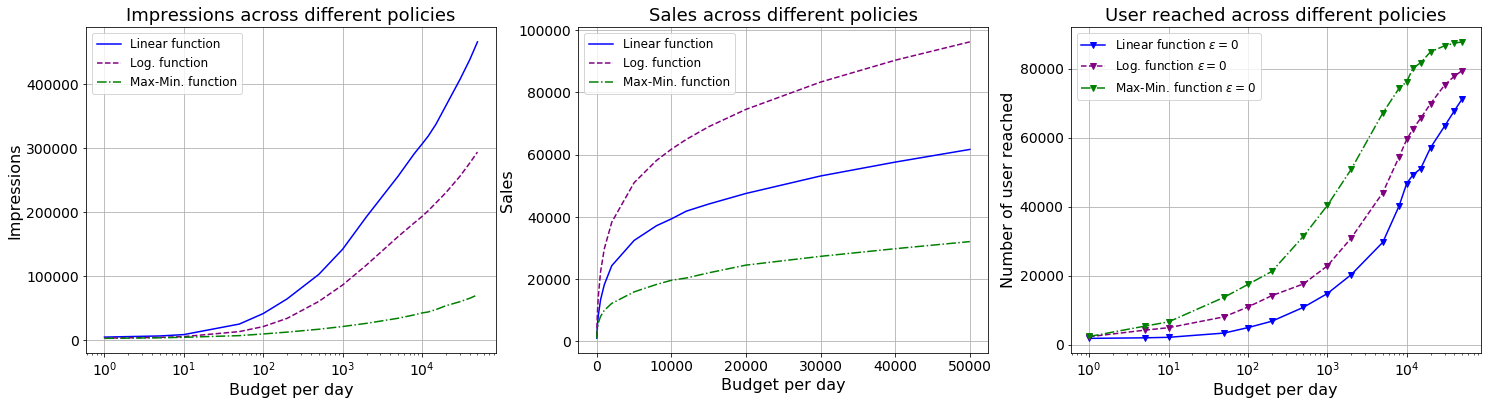

In [44]:
fig, axes = plt.subplots(1,3,figsize=(25,6))

labels_size= 16
Title_size= 18
Labels_graph_size=12

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

Data_Linear.plot('Budget','Impressions', color='blue',label = "Linear function",ax=ax1)
Data_Log.plot('Budget','Impressions',color='purple',label = "Log. function",linestyle='dashed',ax=ax1)
Data_M.plot('Budget','Impressions',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax1)

ax1.set_xlabel('Budget per day',fontsize=labels_size) 
ax1.set_ylabel('Impressions',fontsize=labels_size) 
ax1.grid(True)
ax1.set_title('Impressions across different policies',fontsize=Title_size)
ax1.legend( loc="upper left",fontsize=Labels_graph_size) 

Data_Linear.plot('Budget','Logarithmic utility function', color='blue',label = "Linear function",ax=ax2)
Data_Log.plot('Budget','Logarithmic utility function',color='purple',label = "Log. function",linestyle='dashed',ax=ax2)
Data_M.plot('Budget','Logarithmic utility function',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax2)

ax2.set_ylabel('Sales',fontsize=labels_size) 
ax2.set_xlabel('Budget per day',fontsize=labels_size) 
ax2.grid(True)
ax2.set_title('Sales across different policies',fontsize=Title_size)
ax2.legend( loc="upper left",fontsize=Labels_graph_size) 

Data_Linear.plot('Budget','Reach of campaing $\epsilon=0$', color='blue',marker='v',label = "Linear function $\epsilon=0$",ax=ax3)
Data_Log.plot('Budget','Reach of campaing $\epsilon=0$',color='purple',label = "Log. function $\epsilon=0$",marker='v',linestyle='dashed',ax=ax3)
Data_M.plot('Budget','Reach of campaing $\epsilon=0$',color='green',label = "Max-Min. function $\epsilon=0$",marker='v',linestyle='dashdot',ax=ax3)

ax1.set_xscale('log')
ax3.set_xscale('log')

ax3.set_ylabel('Number of user reached',fontsize=labels_size) 
ax3.set_xlabel('Budget per day',fontsize=labels_size) 
ax3.grid(True)
ax3.set_title('User reached across different policies',fontsize=Title_size)
ax3.legend( loc="upper left" ,fontsize=Labels_graph_size) 

y_x_axis=14
ax1.xaxis.set_tick_params(labelsize=y_x_axis)
ax1.yaxis.set_tick_params(labelsize=y_x_axis)

ax2.xaxis.set_tick_params(labelsize=y_x_axis)
ax2.yaxis.set_tick_params(labelsize=y_x_axis)

ax3.xaxis.set_tick_params(labelsize=y_x_axis)
ax3.yaxis.set_tick_params(labelsize=y_x_axis)


plt.savefig('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.2/Metrics [5.2].png',dpi=300)

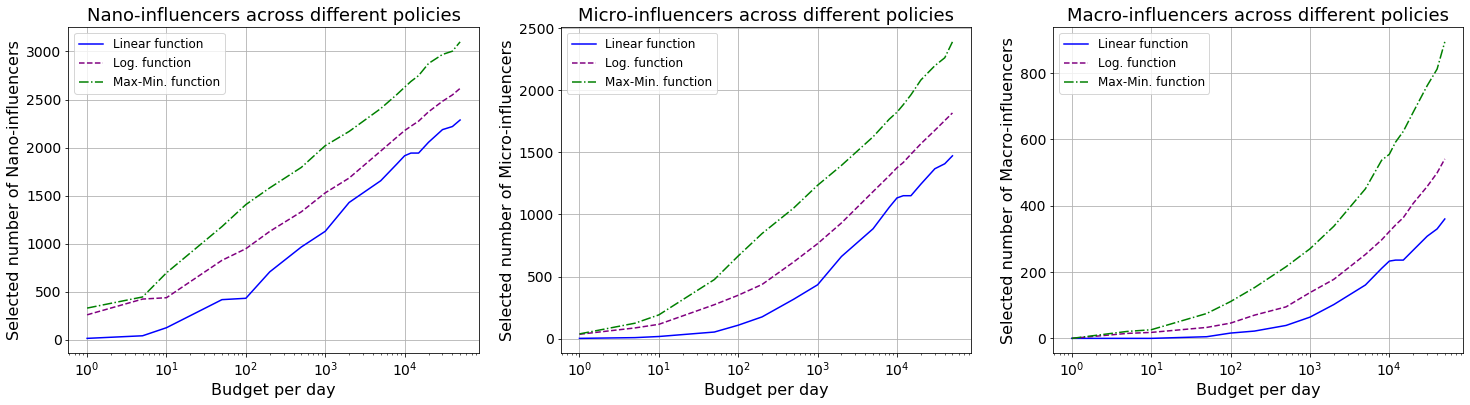

In [45]:
fig, axes = plt.subplots(1,3,figsize=(25,6))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

labels_size= 16
Title_size= 18
Labels_graph_size=12

Data_Linear.plot('Budget','Number of Nano-influencers', color='blue',label = "Linear function",ax=ax1)
Data_Log.plot('Budget','Number of Nano-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax1)
Data_M.plot('Budget','Number of Nano-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax1)

ax1.set_ylabel('Selected number of Nano-influencers',fontsize=labels_size) 
ax1.set_xlabel('Budget per day',fontsize=labels_size) 
ax1.grid(True)
ax1.set_title('Nano-influencers across different policies',fontsize=Title_size)
ax1.legend( loc="upper left",fontsize=Labels_graph_size) 

Data_Linear.plot('Budget','Number of Micro-influencers', color='blue',label = "Linear function",ax=ax2)
Data_Log.plot('Budget','Number of Micro-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax2)
Data_M.plot('Budget','Number of Micro-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax2)

ax2.set_ylabel('Selected number of Micro-influencers',fontsize=labels_size) 
ax2.set_xlabel('Budget per day',fontsize=labels_size) 
ax2.legend( loc="upper left",fontsize=Labels_graph_size) 
ax2.set_title('Micro-influencers across different policies',fontsize=Title_size)
ax2.grid(True)

Data_Linear.plot('Budget','Number of Macro-influencers', color='blue',label = "Linear function",ax=ax3)
Data_Log.plot('Budget','Number of Macro-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax3)
Data_M.plot('Budget','Number of Macro-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax3)

ax3.set_ylabel('Selected number of Macro-influencers',fontsize=labels_size) 
ax3.set_xlabel('Budget per day',fontsize=labels_size) 
ax3.grid(True)
ax3.set_title('Macro-influencers across different policies',fontsize=Title_size)
ax3.legend( loc="upper left",fontsize=Labels_graph_size) 

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

y_x_axis=14
ax1.xaxis.set_tick_params(labelsize=y_x_axis)
ax1.yaxis.set_tick_params(labelsize=y_x_axis)

ax2.xaxis.set_tick_params(labelsize=y_x_axis)
ax2.yaxis.set_tick_params(labelsize=y_x_axis)

ax3.xaxis.set_tick_params(labelsize=y_x_axis)
ax3.yaxis.set_tick_params(labelsize=y_x_axis)

plt.savefig('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.2/Influencers [5.2].png',dpi=300)

We observe from the above figure the following:

- ***Linear objective*** - This campaign gives the highest impressions performance. It gives moderate sales for any budget, but has the worst reach performance. It selects the least number of influencers in all categories, for any budget. 

- ***Logarithmic objective*** - This campaign has the highest sales performance. Also, it has a high impressions for a budget $>1000$ [EUR/day] and a moderate reach performance. It selects more influencers than the linear, in all categories.

- ***Max-min objective*** - This campaign gives the highest audience reach for any given budget, but performs bad in sales and impressions. In fact, for a budget $>40K$ [EUR/day] the campaign can reach all possible users.

For all three objectives, the optimal policy selects mostly Nano- and Micro-influencers in low budgets. Macro-influencers are selected for larger budgets. This is follows closely how selection is done in practice. In addition, we observe that the sales performance per day behaves as a curve with diminishing returns for all budgets and the three campaign objectives, which is natural and expected.

## Multi-platform evaluation

We now study the multi-platform model introduced in our paper to evaluate how the optimal solution splits the budget and consequently the ROI between 2 networks, one synthetic and one from the Twitter data trace [12]. 

From the prior Twitter dataset. we inferred a "star" shaped graph with size $N_{R}=181,621$ users. As second graph we use an Albert-Barabasi network with size $N=5,000$ users. For the star graph we use the empirical posting and re-posting rates per user to derive the average impression ratios calculated via the Markovian method [8]. Similar process is followed for the AB model, albeit posting and re-posting rates are here chosen equal for all users $\lambda_{AB,n}=\lambda_{AB}=1$ [posts/day]. The choice of the imbalance between the size of the two networks is done on purpose to emphasize results.

The budget for both platforms is equal to $B=1,000$ [EUR/day]. In addition, we assume that the campaign is coordinated by the advertiser with ID in AB platform $i_{AB}=0$, and in Twitter  $\text{UserID}=i_{R}=2513730044$ and has $15\textit{#Followers}$ in the second. For user utilities in both platforms, we consider the logarithmic function which quantifies the ROI of the advertising campaign. 

In our study, we want to examine how the budget and consequently ROI is split between the two platforms as the price per post ratio varies. So, we consider in the Twitter Star-graph, a price per post $c_{R,n}=c_R=1,  \forall n \in \mathcal{N}_{R}$ charged by every user. In the Albert-Barabasi model the price per post $c_{AB,n}=c_{AB}$ charged is equal among all users, but varies. Hence, the price-per-post-ratio $\frac{c_{AB}}{c_{R}}$ over both platforms varies. 

To solve the multi-platform model, we need to determine the set of non-negative constants $\{ \sigma_{l} \}_{l=AB,R}$ that maps the potential of a user in the platform $l$, to the respective ROI of the advertiser. For this case we will consider that the relative importance of the platform $l$ is proportionally linked to its price per post, so we will consider that $\sigma_{AB}=\frac{c_{AB}}{c_{AB}+c_{R}}, \sigma_{R}=\frac{c_{R}}{c_{AB}+c_{R}}$.

We proceed to solve and to find the optimal solutions $\mathbf{a}_{x}^{*}$ of the optimization problem [M-BPO] by the elements of both platforms defined above and varying the price per post ratio $x:=\frac{c_{AB,n}}{c_{R,m}}>0, \forall n \in \mathcal{N}_{AB}, m \in \mathcal{N}_{R}$.

The plot below illustrates how the ROI ratio $\frac{\sum_{j \in \mathcal{N}_{R}\setminus \{2513730044 \}} \sigma_{R} log(\omega_{R}^{(j)}(\mathbf{a}_{x}^{*})+1)}{\sum_{j \in \mathcal{N}_{AB}\setminus \{i_{AB} \}} \sigma_{AB} log(\omega_{AB}^{(j)}(\mathbf{a}_{x}^{*})+1)}$ vary as we increase the price per post ratio $x$. 

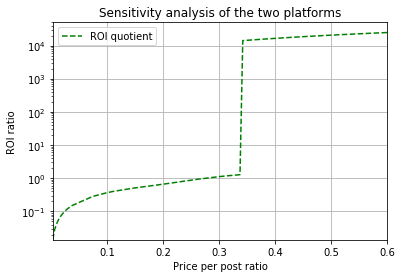

In [46]:
SA=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.3/Multi-platform evaluation -Artificial and real networks.txt', sep="\t", header=None, names=['Cost quotient','ROI quotient','Total ROI','ROI of Russian databse','ROI of simulated network'])
ax1=SA.plot('Cost quotient','ROI quotient',linestyle='dashed', color='g',label = "ROI quotient")
ax1.set_xlabel('Price per post ratio') 
ax1.set_ylabel('ROI ratio') 
ax1.set_title('Sensitivity analysis of the two platforms')
ax1.grid(True)
ax1.set_yscale('log')
ax1.set_xlim([0.0034024444, 0.6])
ax1.set_ylim([0.0138789128, 50000.2221356245])
ax1.legend( loc="upper left" ) 
plt.savefig('/Users/Ricardo Lopez Dawn/Desktop/Optimal Influencer Marketing Campaign under Budget Constraints using Frank-Wolfe/Datasets section 5.3/Sensitivity analysis.png',dpi=300)

We observe that when $x$ is low, or else the $c_{AB}$ is low relative to $c_R$, then the solution tends to favorise the Albert-Barabasi model in budget allocation. The previous behaviour is compensated for the low $\sigma_{AB}$ (proportional to $c_{AB}$) and as a consequence, the ROI ratio is low since that virtually there is no selection of influencers in the Twitter graph. The trend described above continues up to a certain price ratio $x$ beyond which the trend reverses, and the ROI ratio starts increasing due to a high selection of influencers in the Twitter graph and starvation of influencer selection in the Albert-Barabasi graph. This happens, regardless of the marginal increase in $\sigma_{AB}$ as we can see above. As $x$ further increases, the growth in the ROI-ratio will moderate but will continue as long as there are posts to buy, albeit at a slower pace. This example shows how our model can nicely adapt to the multi-platform case, outputting reasonable results.

## Reference

[1]. Lopez Dawn, R.J., & Giovanidis, A.. Social Influencer Selection by Budgeted Portfolio Optimization. In *19th International Symposium on Modeling and Optimization in Mobile, Ad hoc, and Wireless Networks (WiOpt)*, pp. 232-239, 2021

[2]. Ltd, A., 2021. *The influencers with engagement rates 24x higher than PUMA, and how PUMA found them.* https://resources.audiense.com/case-studies/puma-found-social-media-twitter-micro-influencers-engagement-rates-sports-runners-24x-higher/ [Accessed 22 April 2022].

[3]. Spotify. 2021. *#thatsongwhen - Spotify.* https://spotifycampaign.wordpress.com/tag/thatsongwhen/ [Accessed 22 April 2022].

[4]. Influencer Marketing Hub. *Influencer Rates: How Much do Influencers Really Cost in 2022?.*  https://influencermarketinghub.com/influencer-rates/ [Accessed 22 April 2022].

[5]. Kempe, D., Kleinberg, J., & Tardos, É. Maximizing the spread of influence through a social network. In *Proceedings of the ninth ACM SIGKDD international conference on Knowledge discovery and data mining*, pp. 137-146, August, 2003.

[6]. Domingos, P., & Richardson, M.. Mining the network value of customers. In *Proceedings of the seventh ACM SIGKDD international conference on Knowledge discovery and data mining* (pp. 57-66). 2001.

[7]. Nguyen, H., & Zheng, R. On budgeted influence maximization in social networks. IEEE *Journal on Selected Areas in Communications, 31*(6), 1084-1094, 2013.

[8]. Giovanidis, A., Baynat, B., & Vendeville, A. Performance analysis of online social platforms. In *IEEE INFOCOM 2019-IEEE Conference on Computer Communications*, pp. 2413-2421, April 2019.

[9]. Boyd, S., & Vandenberghe, L.. *Convex optimization*. Cambridge university press. 2004.

[10]. Shakkottai, S., Shakkottai, S. G., & Srikant, R. *Network optimization and control.* Now Publishers Inc., 2008

[11]. Frank, M., & Wolfe, P.. An algorithm for quadratic programming. *Naval Res. Logis. Quart.*, 3:95–110, 1956.

[12]. Kaggle.com. 2021. *Russian election 2018 - twitter user activity.* https://www.kaggle.com/borisch/russian-election-2018-twitter [Accessed 22 April 2022].

[13]. Bertsekas, D.. *Convex optimization algorithms*. Athena Scientific. 2015.

[14]. Beck, A., & Teboulle, M.. Mirror descent and nonlinear projected subgradient methods for convex optimization. *Operations Research Letters*, 31(3), 167-175. 2003.

[15]. Aral, S., & Dhillon, P. S.. Social influence maximization under empirical influence models. *Nature human behaviour*, 2(6), 375-382. 2018.

[16]. Leskovec, J., Krause, A., Guestrin, C., Faloutsos, C., VanBriesen, J., & Glance, N.. Cost-effective outbreak detection in networks. In *Proceedings of the 13th ACM SIGKDD international conference on Knowledge discovery and data mining* (pp. 420-429). 2007.

[17]. Lacoste-Julien, S., Jaggi, M., Schmidt, M., & Pletscher, P.. Block-coordinate Frank-Wolfe optimization for structural SVMs. In *International Conference on Machine Learning* (pp. 53-61). PMLR. 2013.

[18]. Pedregosa, F., Negiar, G., Askari, A., & Jaggi, M.. Linearly Convergent Frank-Wolfe with Backtracking Line-Search. In *Proceedings of the 23rd International Conference on Artificial Intelligence and Statistics*. 2020.

[19]. Boyd, S., Xiao, L., \& Mutapcic, A.. Subgradient methods. *lecture notes of EE392o, Stanford University, Autumn Quarter,* 2004.

[20]. Banerjee, S., Jenamani, M., & Pratihar, D. K.. ComBIM: A
community-based solution approach for the Budgeted Influence
Maximization Problem. *Expert Systems with Applications*, 125, 1-13.
2019.